<a href="https://colab.research.google.com/github/unique-subedi/gene-expression/blob/main/Unique_gene_expression_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime
import time
import math
import numpy as np
import scipy
from numpy import linalg as LA
import pandas as pd
import urllib.request
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
!pip install qnorm
import qnorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pyreadr
import pyreadr
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/gene-expression/main/data/brain.rda", "brain.rda")
brain = pyreadr.read_r("brain.rda")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 5.1 MB/s 


In [96]:
expression = pd.DataFrame(brain["expression"])
genes = pd.DataFrame(brain["genes"])
samples = pd.DataFrame(brain["samples"])
genes_c = genes[(pd.isna(genes.sym)) & (pd.isna(genes.chrom))]

In [66]:
genes.at["AFFX-BioDn-3_at", 'chrom'] = float("Nan")
genes_control = genes[['AFFX' in s for s in genes.index]]
genes_control = genes_control[['HUM' not in s for s in genes_control.index]]
genes_control = genes_control[['hum' not in s for s in genes_control.index]]
genes_bac_index = genes_control[genes_control.chrom.isnull() & genes_control.sym.isnull()].index

In [67]:
mean_bac_exp = expression[genes_bac_index].mean(axis=1)
std_bac_exp = expression[genes_bac_index].std(axis=1)
expression =  (expression - mean_bac_exp.values[:, None]).divide(std_bac_exp, axis=0)

`michigan` dataset contains the measurements, done at University of Michigan lab, of anterior cortex and dorsolateral cortex for each patient. 

`michigan_diff` subtracts measurement of anterior cortex from the dorsolateral cortex for each patient.

In [97]:
for i in range(len(expression)):
  ecdf = ECDF(expression.iloc[i, :].values)
  expression.iloc[i, :] = ecdf(expression.iloc[i, :].values)

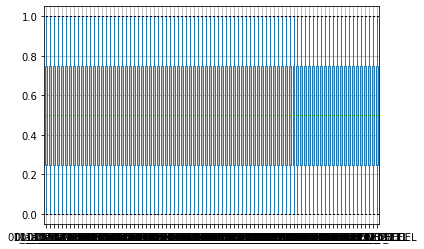

In [ ]:
(expression.T).boxplot()

# Michigan

In [98]:
michigan = expression[(expression.index.str[5] == 'M') & (expression.index.str[3] != 'c') ]
#michigan = michigan.subtract(michigan.mean(), axis = 'columns')
#michigan = michigan.div(michigan.std(), axis ='columns')
michigan_diff = michigan.diff().iloc[1::2,:]
michigan_diff.index = "patient" + michigan_diff.index.str[:2]
michigan_diff.head()
michigan_diff 


,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,0.024524,0.057381,0.063016,-0.016032,-0.070000,-0.001587,0.014127,0.102778,-0.029921,0.152460,...,-0.145635,-0.099286,-0.094048,-0.157698,-0.248333,-0.085794,-0.150635,-0.208810,-0.118413,0.0
patient02,-0.003175,-0.025794,-0.087857,-0.029444,-0.051349,0.055714,-0.093651,0.019286,-0.004365,0.006984,...,0.008333,-0.042460,-0.016508,-0.013810,-0.068571,0.017778,-0.004444,-0.070000,-0.052698,0.0
patient03,-0.019603,-0.075794,-0.063413,-0.025873,-0.065794,0.015952,0.046032,0.011905,0.001032,-0.003333,...,-0.014683,-0.005317,0.005556,-0.017460,-0.078016,-0.011270,0.027302,0.009762,-0.012937,0.0
patient04,-0.008175,0.011587,-0.026032,-0.050079,-0.123333,-0.088651,-0.026508,0.089444,-0.026270,0.001349,...,-0.081190,-0.036667,-0.021111,-0.052619,-0.103095,-0.051508,-0.020397,-0.029365,-0.032857,0.0
patient05,0.022460,0.033810,0.051905,-0.049365,-0.023810,0.093889,-0.017937,-0.012619,0.003413,-0.001270,...,0.002460,-0.035635,0.050873,-0.050952,-0.072381,0.004921,-0.037698,0.032778,0.004206,0.0
patient06,0.016667,0.163175,0.017619,-0.037222,-0.065873,0.003810,-0.040714,-0.006667,-0.014524,0.018889,...,0.019365,-0.090556,-0.004921,0.043730,-0.058571,0.144762,0.237619,0.218175,0.175556,0.0
patient07,0.016429,0.039841,0.089127,-0.016667,-0.036270,0.072857,0.015873,0.066905,-0.006111,-0.048095,...,0.107460,0.114365,0.141825,0.053571,0.102937,0.124683,0.005794,0.108651,-0.063175,0.0
patient08,0.014206,0.016111,0.124683,-0.095079,-0.022063,-0.010159,-0.070556,0.036190,-0.006032,-0.007778,...,-0.013333,0.001429,0.058889,-0.043571,-0.018492,0.002302,-0.081032,0.202619,-0.091508,0.0
patient09,0.013651,0.061587,0.038730,-0.077143,-0.079841,0.016429,-0.070714,-0.015397,-0.009127,-0.105317,...,0.058492,-0.006270,0.060079,0.023413,0.031984,0.086825,0.063730,0.130238,0.048889,0.0
patient10,0.021905,0.004365,-0.002381,-0.060159,-0.066746,0.001270,-0.019444,0.006111,-0.010476,-0.022778,...,0.036508,-0.001746,0.063095,0.075397,0.076111,0.083413,0.026508,0.116587,0.089127,0.0


In [27]:
michigan

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_M_f_1.CEL,0.430275,-0.592964,-0.767948,-0.104520,-0.203685,-0.256329,-0.724709,0.027318,0.712280,-0.049037,...,-0.543254,-0.680786,-0.768376,-0.537692,-0.454195,-0.714816,-0.609910,-0.578224,-0.578040,4.384289
01_d_M_f_1.CEL,0.929562,-0.383124,-0.619948,0.115414,-0.082131,-0.021911,-0.618951,0.645538,0.850044,0.711542,...,-0.547832,-0.683968,-0.835748,-0.553784,-0.560297,-0.723730,-0.643525,-0.665730,-0.560629,4.202936
02_a_M_m_1.CEL,0.968393,-0.439971,-0.548776,0.201039,0.038155,0.165269,-0.536655,0.593402,1.334166,1.269618,...,-0.493342,-0.607074,-0.814675,-0.548954,-0.486974,-0.680808,-0.686395,-0.629190,-0.508771,4.784220
02_d_M_m_1.CEL,1.030256,-0.442583,-0.650262,0.186595,-0.011002,0.343658,-0.645522,0.711285,1.398405,1.514754,...,-0.456311,-0.653384,-0.864493,-0.552059,-0.558690,-0.652518,-0.690213,-0.721761,-0.563169,4.086235
03_a_M_f_1.CEL,0.933049,-0.415421,-0.559354,0.143227,-0.024247,0.111578,-0.640981,0.503565,1.156417,1.250589,...,-0.504055,-0.648140,-0.848652,-0.598862,-0.524198,-0.655614,-0.675851,-0.658340,-0.556616,4.404684
03_d_M_f_1.CEL,1.100441,-0.444624,-0.609275,0.271992,0.010995,0.336218,-0.560884,0.782261,1.566980,1.584917,...,-0.468477,-0.644423,-0.889845,-0.596656,-0.587390,-0.662649,-0.633552,-0.636467,-0.532531,4.507124
04_a_M_m_1.CEL,0.932073,-0.458182,-0.594888,0.094307,-0.040770,0.018193,-0.575184,0.320141,1.007815,1.017691,...,-0.451535,-0.629638,-0.790475,-0.532520,-0.484604,-0.641278,-0.634712,-0.713046,-0.587627,4.438865
04_d_M_m_1.CEL,1.106091,-0.384243,-0.613292,0.130759,-0.124535,-0.016149,-0.588353,0.830824,1.011082,1.308175,...,-0.497632,-0.666790,-0.870918,-0.566622,-0.573819,-0.702294,-0.651949,-0.769094,-0.611195,4.195910
05_a_M_m_1.CEL,0.854845,-0.476015,-0.610228,0.110503,-0.019916,0.153813,-0.606184,0.477688,1.113017,1.049484,...,-0.503789,-0.644682,-0.790708,-0.559065,-0.479477,-0.674561,-0.665531,-0.651166,-0.589659,4.423454
05_d_M_m_2.CEL,1.392682,-0.417629,-0.533557,0.055172,-0.023843,0.469807,-0.604794,0.510117,1.498360,1.295998,...,-0.480959,-0.665417,-0.703914,-0.592818,-0.537193,-0.651346,-0.690032,-0.598506,-0.565375,4.809086


In [99]:
irvine = expression[(expression.index.str[5] == 'I') & (expression.index.str[3] != 'c') ]
#irvine = irvine.subtract(irvine.mean(), axis = 'columns')
#irvine = irvine.div(irvine.std(), axis ='columns')
irvine_diff = irvine.diff().iloc[1::2,:]
irvine_diff.index = "patient" + irvine_diff.index.str[:2]
irvine_diff.head()
irvine_diff


,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,-0.005873,0.005159,-0.074365,-0.045079,-0.009206,0.005952,-0.047778,0.007778,-0.022937,0.107460,...,-0.019683,0.011587,0.046270,0.041746,0.025794,0.053810,0.001508,-0.098254,0.084206,0.0
patient02,-0.004524,-0.022857,0.022698,-0.012857,-0.077302,-0.018016,0.011587,-0.010952,-0.031429,0.017778,...,0.366746,0.445476,0.360159,0.360397,0.229921,-0.005159,-0.008175,-0.115952,-0.015000,0.0
patient03,-0.001270,0.038492,-0.039048,-0.053889,-0.024683,0.008175,0.030238,-0.042381,0.011429,-0.010000,...,0.041587,-0.031270,0.066111,0.033651,0.016825,0.044444,0.068016,0.104841,0.076984,0.0
patient04,-0.004921,-0.070952,-0.053492,0.008333,0.025317,-0.073810,-0.050635,-0.012460,0.015159,-0.010873,...,0.090794,-0.039921,0.101984,-0.023095,0.060635,0.096746,0.050952,0.079841,0.122143,0.0
patient05,-0.003492,-0.036746,0.072143,0.042063,0.025556,0.047460,0.041587,-0.037937,0.011429,0.012778,...,-0.054683,-0.020873,0.001746,-0.107857,-0.040873,-0.012857,-0.011984,-0.099762,-0.012619,0.0
patient06,-0.005397,0.104444,-0.052857,-0.022143,0.055397,-0.060476,-0.034048,-0.071587,0.001746,0.012937,...,0.037619,0.029127,0.036032,0.030079,0.075556,0.101667,0.019921,-0.111667,-0.089127,0.0
patient07,-0.003968,0.035635,0.006587,0.018095,0.004921,0.040556,0.001429,-0.000635,0.001746,-0.014603,...,0.132937,0.150159,0.002540,0.153016,0.069206,0.073016,0.098889,0.155159,0.213492,0.0
patient08,0.002937,-0.069365,0.087857,0.045952,-0.010238,-0.050952,-0.016905,-0.010556,0.000317,-0.011270,...,0.041984,0.102302,0.047540,0.092381,0.028175,0.115635,0.124444,0.055714,0.139048,0.0
patient09,0.003016,0.002937,-0.014841,-0.019841,0.078175,0.035079,-0.000635,-0.011190,0.003095,-0.009524,...,-0.100952,-0.068016,0.026984,-0.099683,-0.037460,-0.005952,-0.012698,-0.018651,-0.064921,0.0
patient10,-0.004921,-0.099524,0.039762,-0.006587,0.025238,-0.071190,-0.055397,-0.012698,0.001905,0.024921,...,-0.019762,-0.081587,0.019762,0.020476,0.123016,-0.108333,-0.075159,-0.069365,0.076587,0.0


In [31]:
irvine_diff.mean(axis =0)

1000_at                -0.008904
1001_at                -0.035945
1002_f_at              -0.047535
1003_s_at              -0.016269
1004_at                 0.000262
                          ...   
AFFX-YEL002c/WBP1_at   -0.011029
AFFX-YEL018w/_at       -0.023265
AFFX-YEL021w/URA3_at   -0.072353
AFFX-YEL024w/RIP1_at    0.008402
AFFX-hum_alu_at         0.102560
Length: 12600, dtype: float64

In [60]:
irvine_diff

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,0.304281,0.067273,-0.071414,0.035571,0.079215,0.162744,-0.063110,0.350450,-0.122282,0.466669,...,0.013201,-0.027055,0.007405,0.017827,0.007951,0.016672,-0.020590,-0.092765,0.075254,-0.076939
patient02,0.581613,-0.043913,-0.094365,0.122729,-0.056728,0.230105,-0.130798,0.417427,0.082556,0.800758,...,0.664071,0.555060,0.354549,0.512607,0.315536,-0.143483,-0.172133,-0.221479,-0.100545,0.487901
patient03,-0.106744,0.011818,-0.069385,-0.175227,-0.095084,-0.033019,0.013460,-0.417268,0.216056,-0.187831,...,0.025700,-0.056282,0.084603,0.017592,-0.002660,0.033685,0.056681,0.094465,0.063872,0.011080
patient04,-0.496400,-0.207352,-0.106523,-0.204921,-0.141855,-0.450285,-0.066697,-0.537172,-0.172819,-0.547628,...,0.038481,-0.020494,0.165084,-0.047411,0.063839,0.096304,0.060507,-0.004158,0.099764,0.124706
patient05,-0.070834,-0.011123,0.118122,0.128711,0.077324,0.215784,0.084516,-0.367094,0.281659,0.127467,...,-0.027532,0.007367,0.036029,-0.078380,-0.004151,0.016785,0.021888,-0.072400,0.026393,-0.133393
patient06,-0.042759,0.158992,-0.154232,-0.013025,0.116304,-0.180197,-0.151120,-0.603620,0.082182,0.116187,...,0.004877,-0.065158,-0.107566,-0.059837,-0.004288,0.001716,-0.094361,-0.321277,-0.215813,0.384874
patient07,-0.253002,-0.048213,-0.112953,-0.047300,-0.075729,0.130142,-0.120875,-0.143831,-0.157956,-0.153900,...,0.037475,0.025687,-0.148815,0.020265,-0.056393,-0.053468,-0.036678,0.017695,0.085274,-0.743821
patient08,-0.001337,-0.170035,-0.011147,0.025964,-0.085147,-0.197236,-0.114429,-0.112534,0.008084,-0.127307,...,-0.054145,0.002015,-0.032510,-0.010652,-0.070679,0.021928,0.023964,-0.046993,0.033079,0.011437
patient09,0.064415,0.034260,0.023660,0.001151,0.167209,0.222056,0.037226,-0.114371,0.137662,0.018726,...,-0.061926,-0.025942,0.069343,-0.051023,0.002672,0.028853,0.025222,0.017256,-0.023799,0.482269
patient10,-0.068276,-0.151154,0.002885,-0.036339,0.017110,-0.190925,-0.078502,-0.164984,0.077350,0.098966,...,-0.047426,-0.120098,-0.011685,-0.012314,0.085650,-0.129286,-0.097148,-0.093871,0.040540,0.477484


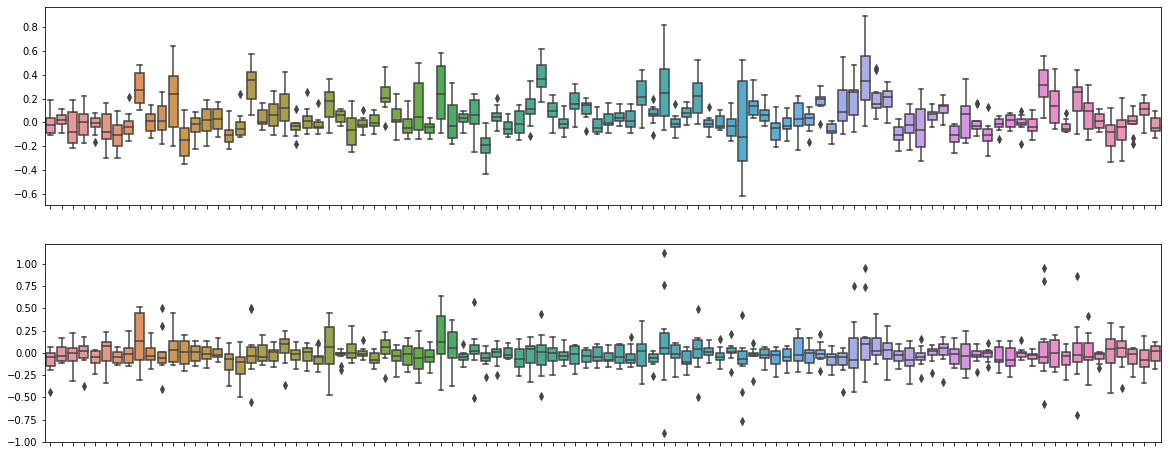

In [13]:
# Plot human genes
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
g1 = sns.boxplot( data=michigan_diff.iloc[:, 200:300], ax=ax[0])
g1.set(xticklabels=[])
g1.set(xlabel=None)
g2 = sns.boxplot( data=irvine_diff.iloc[:, 200:300], ax=ax[1])
g2.set(xticklabels=[])
g2.set(xlabel=None)
plt.show()


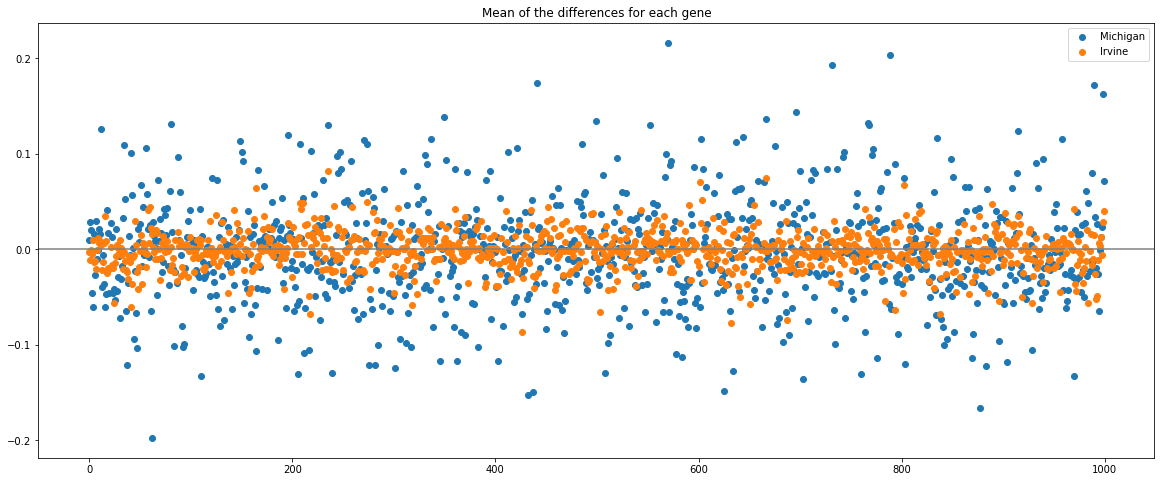

In [105]:
m = michigan_diff.mean(axis =0)
i = irvine_diff.mean(axis =0)

means = pd.DataFrame({'M': m, 'I':i})

plt.figure(figsize=(20, 8))
plt.scatter(range(len(means.M[:1000])), means.M[:1000], label='Michigan')
plt.scatter(range(len(means.I[:1000])), means.I[:1000], label='Irvine')
plt.axhline(y=0, color='grey')
plt.title('Mean of the differences for each gene')
plt.legend()
plt.savefig("meandiff.png")

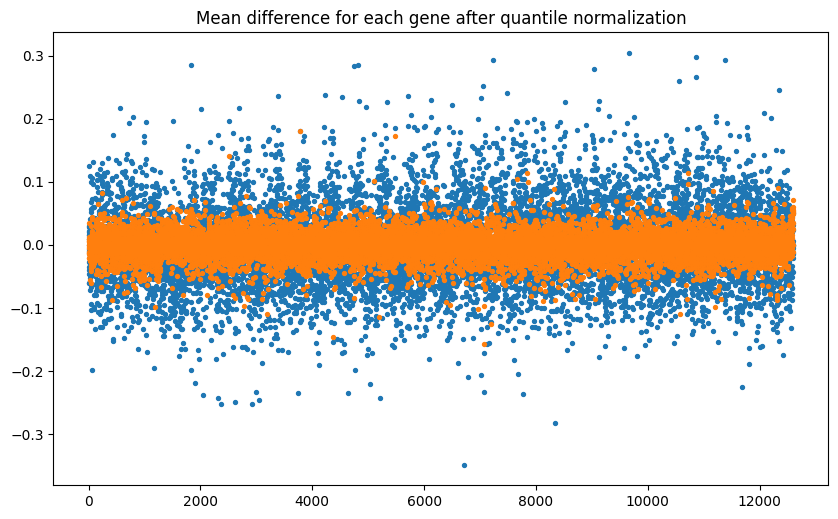

In [104]:
plt.figure(figsize=(10, 6), dpi=100)
g1 = plt.scatter(range(len(m)), m, s = 8 )
g2 = plt.scatter( range(len(i)), i, s= 8)
plt.title("Mean difference for each gene after quantile normalization")
#plt.show()
plt.savefig("meandiff_ECDF_normalization.png")

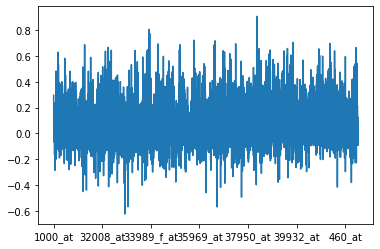

In [80]:
m.plot()

In [59]:
m=  np.sign(michigan_diff.mean(axis =0))
i = np.sign(irvine_diff.mean(axis =0))
sign = np.equal(m,i)
sign = sign[sign == False]
g = np.array(genes.loc[sign.keys()].loc[:, 'sym'].values)
#g = g[~np.isnan(g)]
g = g[~pd.isnull(g)]
g = np.unique(g)
len(g)

4711

In [17]:
len(means.M[300:600])

300

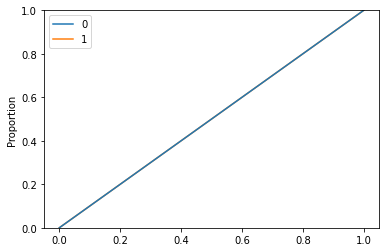

In [ ]:
#sns.ecdfplot([michigan.iloc[19, :].values, irvine.iloc[19, :].values ])

Take absolute values of each difference and compute the average over all patients for each probe sets and obtain top 20 probe sets with highest magnitude.

In [ ]:
top_probes_michigan = michigan_diff.mean().sort_values(ascending = False).iloc[:20]
top_probes_michigan
top_genes_michigan = np.array(genes.loc[top_probes_michigan.keys()].loc[:, 'sym'].values)
top_genes_michigan

array(['BTN3A1', 'AURKB', 'GIPC1', nan, 'PRPF40A', 'ZNF609', 'MYRIP',
       'BHLHE40', 'AMH', 'JUND', 'PABPN1', 'LDB1', 'PLCG1', 'PAIP1',
       'DLG4', 'LOC157627', 'BEAN', 'GTF3C1', 'PIK3R3', 'SLC4A7'],
      dtype=object)

In [ ]:
top_probes_irvine = irvine_diff.mean().sort_values(ascending = False).iloc[:20]
top_probes_irvine = np.array(genes.loc[top_probes_irvine.keys()].loc[:, 'sym'].values)
top_probes_irvine

array(['CARTPT', 'SCN1B', 'FGF9', 'KLF9', 'COX7A1', 'GRIN1', 'MYOM2', nan,
       'CABP1', 'TSPAN5', 'KIAA1107', 'UPP1', 'VSNL1', 'TFF1', 'HTR7',
       'SNCB', 'INA', 'OLFM1', 'PRKAR1B', 'NRGN'], dtype=object)

Map top probe sets to top genes using `genes` dataset. 

In [ ]:
def get_top_genes(lab):
  if(lab == 'M' or lab == 'I'):
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c')]
    df_diff = df.diff().iloc[1::2,:]
    control_mean = df_diff[genes_c.index].iloc[:,-5:-1].apply(np.mean, axis=1)
    control_std = df_diff[genes_c.index].iloc[:, -5:-1].apply(np.std, axis = 1)
    df_diff = df_diff.sub(control_mean, axis='rows')
    df_diff = df_diff.div(control_std, axis='rows') 
  
  else:
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c') & ~(expression.index.str[1].isin(['1', '2', '5', '6', '7', '9'])) ]
    df_diff = df.diff().iloc[1::2,:]
  top_probes = df_diff.abs().mean().sort_values(ascending = False).iloc[:20]
  top_genes = genes.loc[top_probes.keys()].loc[:, 'sym'].values
  return np.array(top_genes)


In [ ]:
top_genes_michigan = get_top_genes("M")
top_genes_irvine = get_top_genes("I")
#top_genes_davis = get_top_genes("D")
print(top_genes_irvine)
print(top_genes_michigan)
#print(top_genes_davis)

['NEFH' 'TF' 'NEFM' 'APOE' 'PLP1' 'SCN1B' 'VIM' 'C1orf61' 'CRYAB' 'SPP1'
 'MYH11' 'GFAP' 'NCDN' 'CRYAB' 'CABP1' 'HTRA1' 'ACTA2' 'NEFL' 'NTRK2'
 'GPRC5B']
['NCDN' 'NRGN' 'MDH1' 'STXBP1' 'RPL21' 'EEF1A2' 'CLASP2' 'VSNL1' 'AP2M1'
 'CBX6' 'TSPYL4' 'NPTN' 'GNAS' 'PFTK1' 'C16orf45' 'NCKAP1' 'CALM2' 'DNM1'
 'KCNJ4' 'NEFL']


## Hypothesis testing 
Wilcoxon signed-rank test for each gene(Remove controls).  
Tests whether the median of the difference is 0.  
A non-parametric alternative test to the paired t-test. 

In [74]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
# Remove controls(Probesets starting with 'AFFX')
michigan_diff = michigan_diff.filter(regex='^(?!AFFX).*$', axis=1)
irvine_diff = irvine_diff.filter(regex='^(?!AFFX).*$', axis=1)


#p_val_M = michigan_diff.apply(ttest_1samp, popmean = 0).iloc[1,:].sort_values(ascending = True)[:100]
p_val_M = michigan_diff.apply(wilcoxon, mode = 'exact').iloc[1,:].sort_values(ascending = True)[:2000]
print(p_val_M)

print('Michigan')

print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_M, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_M, method='fdr_bh')[0])))


#p_val_I = irvine_diff.apply(ttest_1samp, popmean = 0).iloc[1,:].sort_values(ascending = True).iloc[:100]
p_val_I = irvine_diff.apply(wilcoxon, mode = 'exact').iloc[1,:].sort_values(ascending = True).iloc[:1100]
print(p_val_I)
print('Irvine')
print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_I, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_I, method='fdr_bh')[0])))

1000_at      0.001953
38451_at     0.001953
260_at       0.001953
40340_at     0.001953
38455_at     0.001953
               ...   
2016_s_at    0.003906
41127_at     0.003906
36689_at     0.003906
36690_at     0.003906
31329_at     0.003906
Name: 1, Length: 2000, dtype: float64
Michigan
rejected H0(bonferroni):0
rejected H0(BH):2000 

37009_at      0.001953
1731_at       0.001953
32833_at      0.001953
37819_at      0.001953
33259_at      0.001953
                ...   
32870_g_at    0.048828
37080_at      0.048828
37994_at      0.048828
40429_r_at    0.048828
34117_at      0.048828
Name: 1, Length: 1100, dtype: float64
Irvine
rejected H0(bonferroni):0
rejected H0(BH):1100 



In [ ]:
np.array(genes.loc[p_val_M.keys()].loc[:, 'sym'].values)

array(['SPRR2D', 'CYTH2', 'GLT25D2', 'PCGF2', 'LGALS9', 'BTN3A1',
       'AMIGO2', 'LGALS4', 'CLCN1', 'USP6', 'RUNX2', 'ITM2B', nan, 'EZH1',
       'BCL3', 'THRA', 'KIAA0913', 'BMI1', 'ACACB', 'PEX10', 'PAIP1',
       'FAAH', 'CNKSR1', nan, 'IQGAP1', 'GABRR2', 'CCNT2', 'EAPP',
       'CADM4', nan, 'SERPINE1', 'CLTCL1', 'STAT5B', 'REEP1', 'CSNK1A1',
       'SMARCD2', 'CTBP1', 'RBBP6', 'AASS', 'GALNTL4', 'AFG3L2',
       'FAM171A1', 'SOCS1', 'ACVR1B', 'PTPN7', 'DAPK3', 'RSL1D1', 'GJC2',
       'NAB2', 'PAX8', 'CCNG2', 'ATM', nan, 'PAX7', 'FGFR4', 'PSTPIP1',
       'COL1A1', 'ATXN10', 'OSBP', 'AOAH', nan, 'SLC4A8', 'MTSS1',
       'CEACAM3', 'SFRS4', 'PARP1', 'ALDOB', 'CSF2', nan, 'PARN',
       'SLC8A1', nan, 'PI15', 'IDS', 'LOC201229', 'TUSC4', 'CSDC2',
       'SP100', 'PPP2R2A', 'PLOD3', 'TUBGCP2', 'GJC1', 'DNALI1', nan,
       'PGLYRP1', 'SLC2A4', 'SFRS3', 'CCDC64', 'PURA', 'PARP2', 'CD72',
       'STAT1', 'VCL', 'PABPN1', 'ABL2', 'FNTB', 'NXF1', 'MPV17',
       'STXBP2', 'PDLIM7'], d

In [ ]:
np.array(genes.loc[p_val_I.keys()].loc[:, 'sym'].values)

array(['LOXL2', 'NELL1', 'CARTPT', 'NUPR1', 'ATRNL1', 'CTSO', 'MYLK',
       'SLC1A4', 'PLEKHM2', 'FADS1', 'BAZ2B', 'RAB7L1', 'GRIN2C', 'SMAD4',
       nan, 'MTX1', 'COX7A1', 'IFFO1', nan, 'SMTN', 'ILF2', 'WASL',
       'TIPARP', 'MTHFS', 'PSG3', 'ERBB3', 'MYH11', 'HDAC1', 'PHKB',
       'PDGFRA', 'RAB11FIP5', 'PCSK1', 'OLFM1', 'ROBO1', 'FGF9', 'MAST4',
       'POLR2J', 'IKBKE', 'CSNK2A2', 'TCF7', 'CBFB', 'TEX261', 'GJA5',
       'ANXA4', 'BRF1', 'TRIM23', 'FGF13', 'PNPLA6', 'KLF9', 'SASH3',
       'PRKAR2B', 'PDE4D', 'FGFR2', nan, 'SERPINF1', 'YLPM1', 'KIAA0323',
       'PSMA5', nan, 'MECOM', 'RAE1', 'AHCYL1', 'TIAL1', 'TMBIM6', 'RYR2',
       'AHNAK', 'MAPK8IP1', 'SERPINB1', nan, 'PLCD1', 'NTRK2', 'UPP1',
       'KDELR2', 'DLG1', 'TAGLN', 'MARCKSL1', 'ACADVL', 'SMPD1', 'TPM2',
       'PCTK2', 'PARP4', 'PKP2', 'PHYHIP', 'CFI', 'RICH2', 'AIMP1',
       'FGF2', 'SLC3A2', 'PTGDS', 'DPYSL4', 'PGC', 'KIAA0125', 'MTIF2',
       'PCTK3', 'PLOD3', 'CLK1', 'BIN1', 'ELOVL5', 'LITAF', 'EFS'],
  